<a href="https://colab.research.google.com/github/mwithgod3952/jh_Natural_language_processing/blob/main/Soft_max_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving Soft_max_1.jpg to Soft_max_1.jpg
Saving Soft_max_2.jpg to Soft_max_2.jpg
User uploaded file "Soft_max_1.jpg" with length 291607 bytes
User uploaded file "Soft_max_2.jpg" with length 231318 bytes


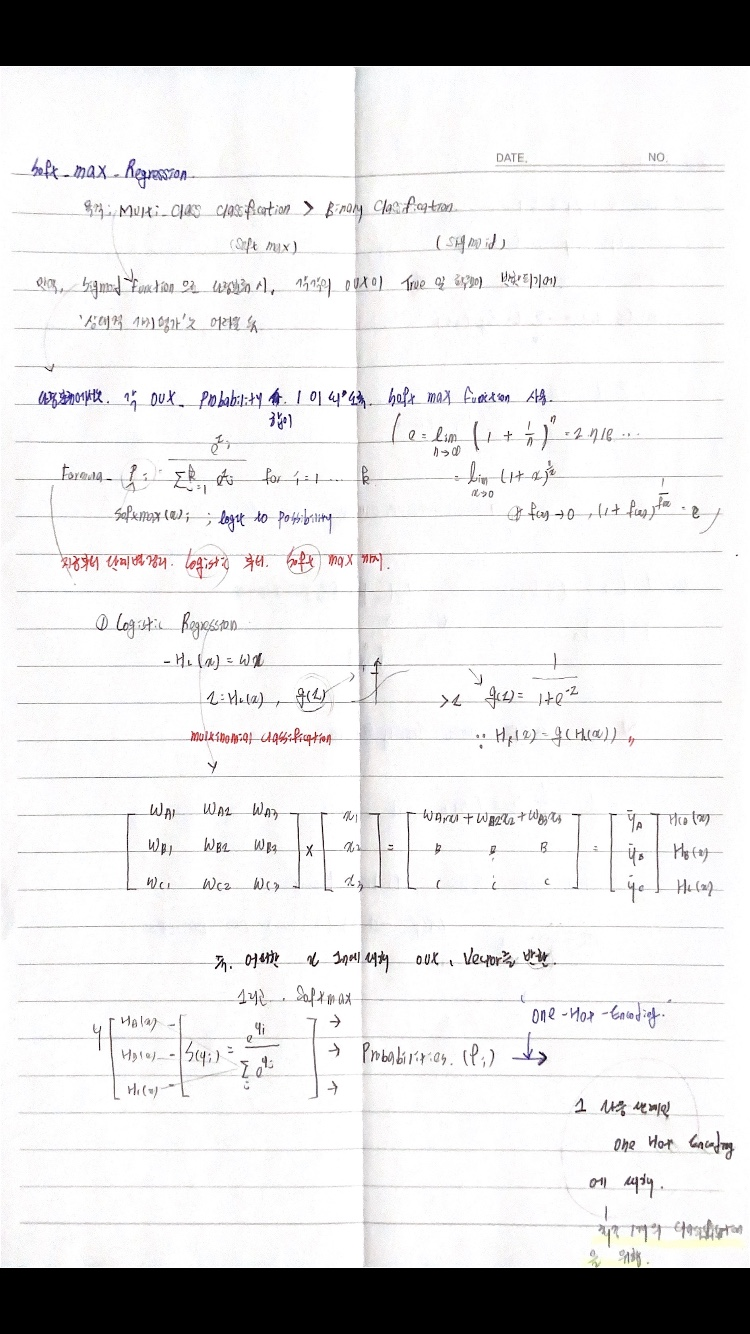

In [3]:
from IPython.display import Image
Image('Soft_max_1.jpg')

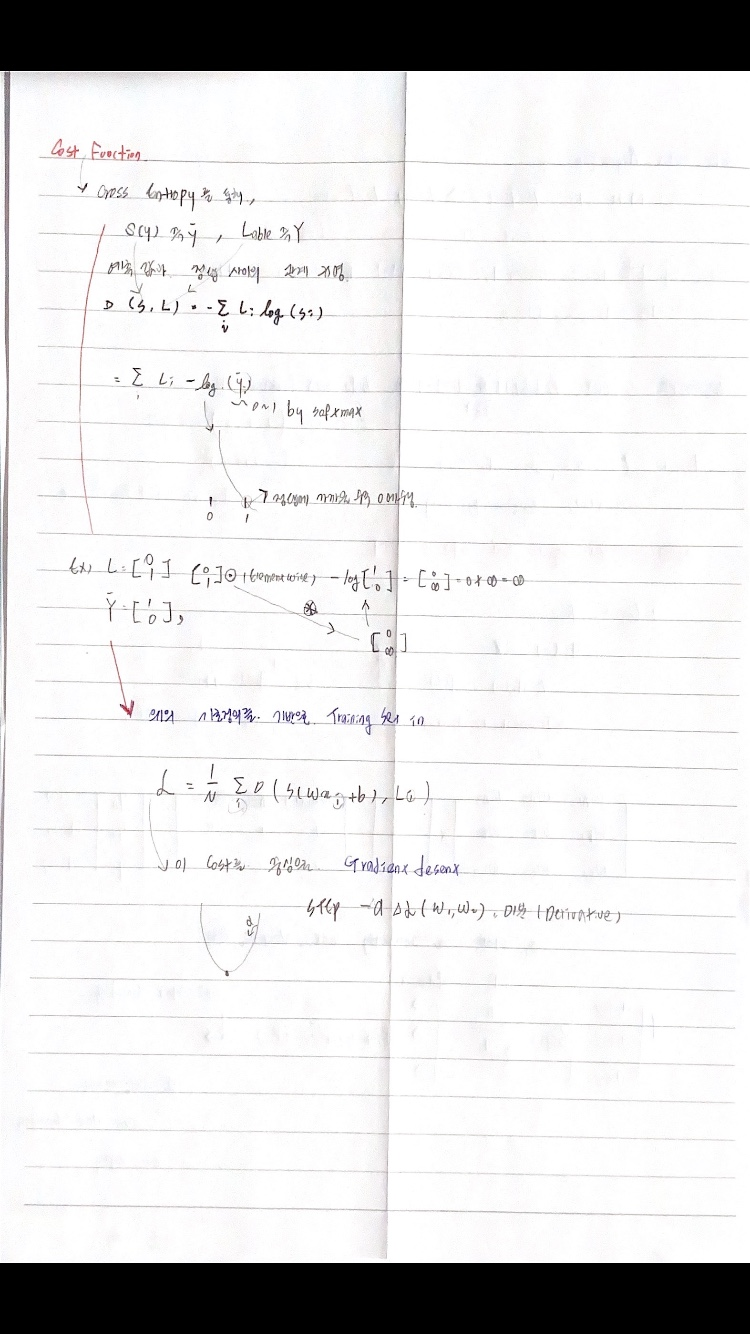

In [2]:
Image('Soft_max_2.jpg')

---

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
iris.head(b)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
print("품종 종류:", iris["species"].unique(), sep="\n")

품종 종류:
['setosa' 'versicolor' 'virginica']


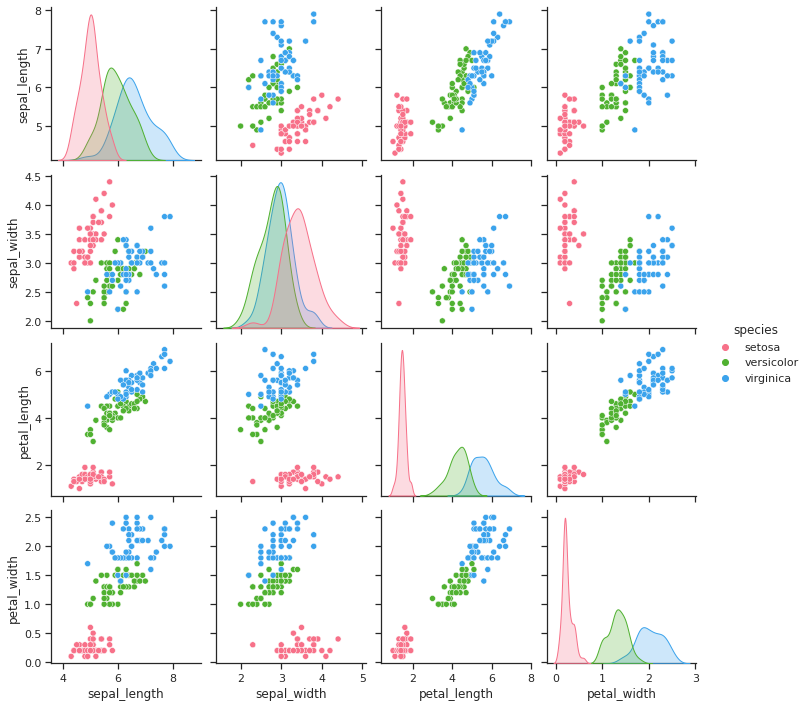

In [10]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris, hue="species", palette="husl")

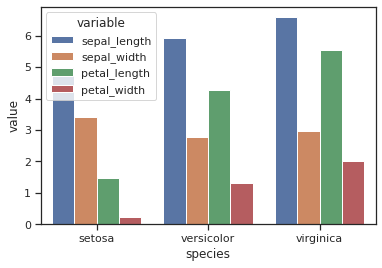

In [34]:
tidy = iris.melt(id_vars='species')
sns.barplot(x='species', y='value', hue='variable', data=tidy, ci=None)

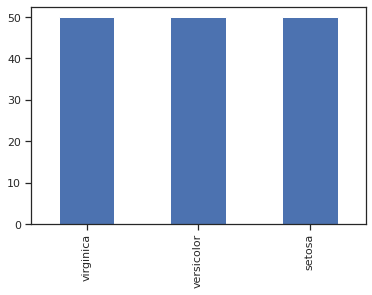

In [35]:
iris['species'].value_counts().plot(kind='bar')

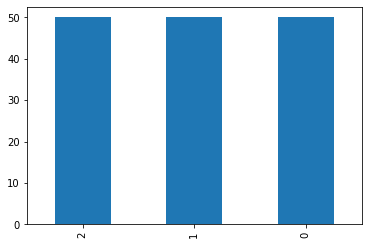

In [5]:
species_name = iris.species.unique()
iris['species'] = iris['species'].replace([species_name[2],species_name[1],species_name[0]],[0,1,2])
iris['species'].value_counts().plot(kind='bar')

In [6]:
data_X = iris.iloc[:,0:4].values 
data_y = iris['species'].values

In [7]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# y값 품좀에 대한 값을 One hto encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import optimizers 

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 3s 4ms/step - loss: 6.2476 - accuracy: 0.2718 - val_loss: 3.4060 - val_accuracy: 0.6667
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 5.3382 - accuracy: 0.5034 - val_loss: 2.8912 - val_accuracy: 0.7667
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 4.2817 - accuracy: 0.6263 - val_loss: 2.4166 - val_accuracy: 0.7667
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 3.7614 - accuracy: 0.6286 - val_loss: 1.9170 - val_accuracy: 0.8000
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 2.7186 - accuracy: 0.6452 - val_loss: 1.4447 - val_accuracy: 0.8000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 2.0188 - accuracy: 0.6158 - val_loss: 1.0321 - val_accuracy: 0.8000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2953 - accuracy: 0.6561 - val_loss: 0.8303 - val_accuracy: 0.7667

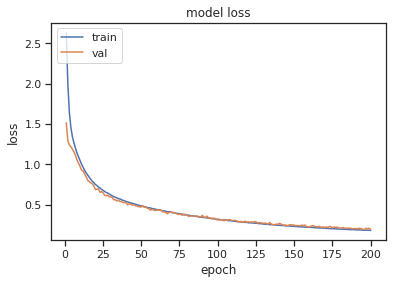

In [80]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()